# PD 8 - Wstępna analiza danych

Użyte dane pochodzą z 'https://www.kaggle.com/mohamedbakrey/housecsv',
jest to ramka zawierająca informacje o domach. 
Wczytanie danych:

In [303]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pandas as pd 
import scipy as sc
import warnings as wr


df1 = pd.read_csv('houses.csv', delimiter=',')


## Podstawowe informacje

In [69]:
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.190
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.800
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.000
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.400
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,2.50,1860.0,6325.0,2.0,0.0,0.0,4.0,7.0,1860.0,0.0,1991.0,0.0,98038.0,47.3492,-122.030,1860.0,29.100
996,2.0,2.75,1590.0,20917.0,1.5,0.0,0.0,3.0,5.0,1590.0,0.0,1920.0,0.0,98001.0,47.2786,-122.250,1310.0,19.995
997,2.0,1.00,850.0,2340.0,1.0,0.0,0.0,3.0,7.0,850.0,0.0,1922.0,0.0,98105.0,47.6707,-122.328,1300.0,55.350
998,2.0,1.00,1030.0,4188.0,1.0,0.0,0.0,3.0,8.0,1030.0,0.0,1981.0,0.0,98038.0,47.3738,-122.057,1450.0,18.995


Widzimy już błędy w danych, w kolumnie 'bathrooms' pojawiają się wartości nie całkowite

In [70]:
df1.isnull().sum()

bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
price            1
dtype: int64

Tylko jeden raz występują w kolumnach wartości 'null' jak widać wyżej wszystkie w ostatnim wierszu tabeli.

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

Wszystkie kolumny mają wartości numeryczne (float64)

In [72]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,999.0,3.349349,0.852367,0.0000,3.0000,3.0000,4.00000,7.0000
bathrooms,999.0,2.045796,0.721983,0.0000,1.5000,2.0000,2.50000,5.0000
sqft_living,999.0,2051.397397,888.351113,380.0000,1405.0000,1900.0000,2475.00000,6070.0000
sqft_lot,999.0,14707.242242,28975.077254,649.0000,5419.0000,8040.0000,11508.50000,315374.0000
floors,999.0,1.446947,0.517420,1.0000,1.0000,1.0000,2.00000,3.5000
waterfront,999.0,0.008008,0.089173,0.0000,0.0000,0.0000,0.00000,1.0000
view,999.0,0.237237,0.765472,0.0000,0.0000,0.0000,0.00000,4.0000
condition,999.0,3.464464,0.689521,1.0000,3.0000,3.0000,4.00000,5.0000
grade,999.0,7.605606,1.160734,4.0000,7.0000,7.0000,8.00000,12.0000
sqft_above,999.0,1750.233233,790.466905,380.0000,1190.0000,1540.0000,2135.00000,6070.0000


Przedstawmy rozkład danych w poszczególnych kolumnach za pomocą wykresów:

In [73]:
df_house = df1.drop(999)

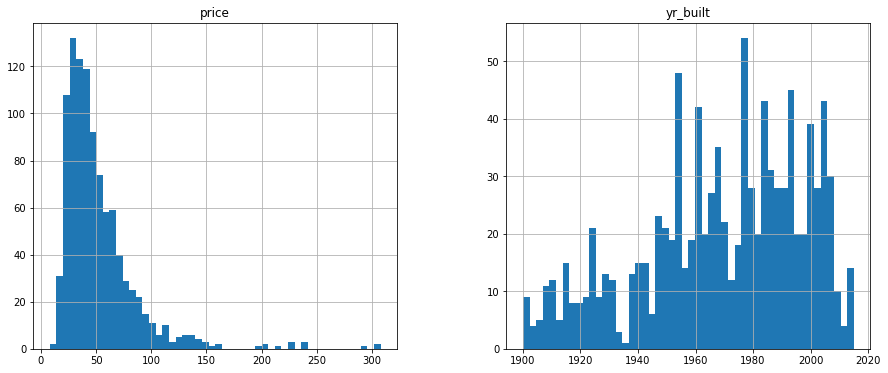

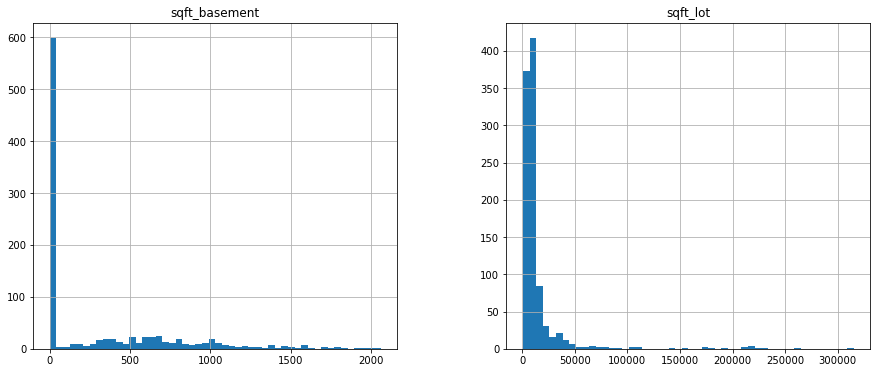

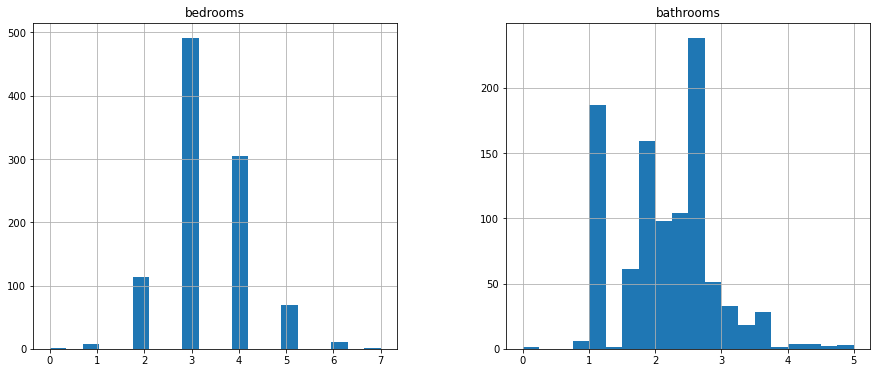

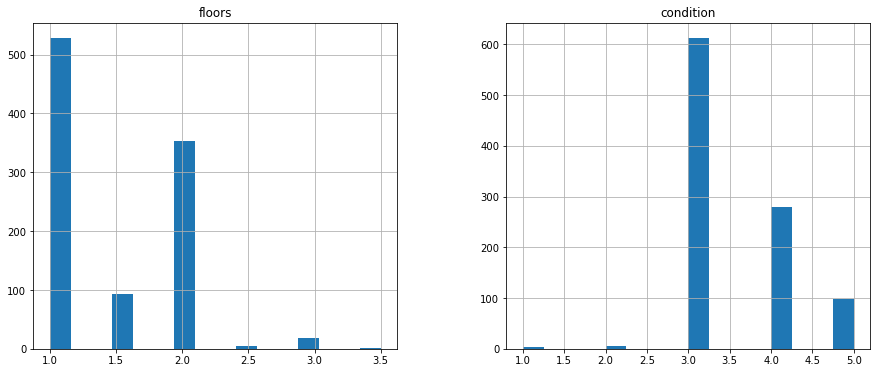

In [86]:
df_house[['price', 'yr_built']].hist(figsize=(15,6), bins=50)
df_house[['sqft_basement', 'sqft_lot']].hist(figsize=(15,6), bins=50)
df_house[['bedrooms', 'bathrooms']].hist(figsize=(15,6), bins=20)
df_house[['floors', 'condition']].hist(figsize=(15,6), bins=16)



plt.show()

W kolumnach 'sqft_lot' oraz 'sqft_basement' możliwe błędy danych

Sprawdźmy zależności między zmiennymi:

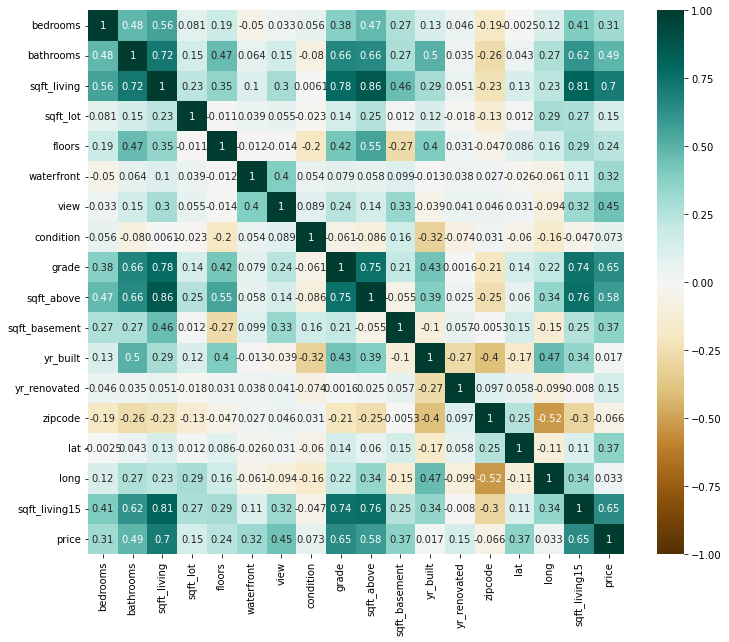

In [76]:
num_features = [name for name in df_house.columns if pd.api.types.is_numeric_dtype(df_house[name])]

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_house[num_features].corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

## Wpływ lokalizacji na cenę

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

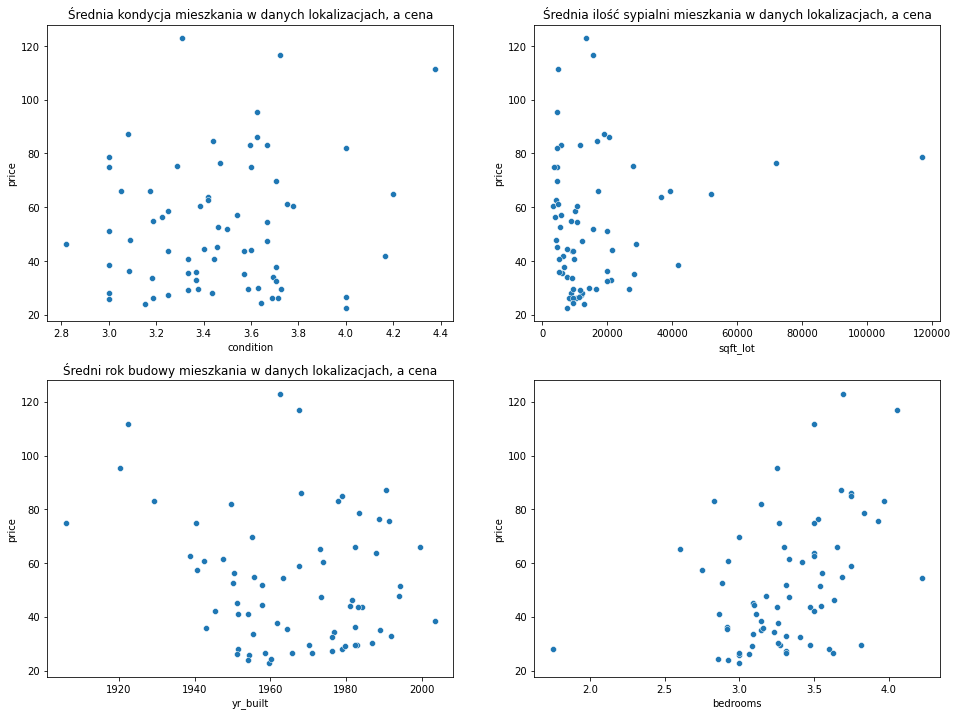

In [87]:
df_local = df_house.groupby('zipcode').mean()

fig, axes = plt.subplots(2, 2, figsize = (16, 12))

axes[0][0].set_title('Średnia kondycja mieszkania w danych lokalizacjach, a cena')
axes[0][1].set_title('Średnia powierzchnia użytkowa mieszkania w danych lokalizacjach, a cena')
axes[1][0].set_title('Średni rok budowy mieszkania w danych lokalizacjach, a cena')
axes[0][1].set_title('Średnia ilość sypialni mieszkania w danych lokalizacjach, a cena')

sns.scatterplot(ax=axes[0][0], x = df_local['condition'], y = df_local['price'])
sns.scatterplot(ax=axes[0][1], x = df_local['sqft_lot'], y = df_local['price'])
sns.scatterplot(ax=axes[1][0], x = df_local['yr_built'], y = df_local['price'])
sns.scatterplot(ax=axes[1][1], x = df_local['bedrooms'], y = df_local['price'])




Widać wpływ lokalizacji na cenę. Mimo lepszych średnich warunków, cena średnia w niektórych lokalizacjach pozostaje niższa niż reszty, zachodzi również zależność odwrotna, najdroższe średnie ceny są w lokalizacjach o wcale nie najlepszych mieszkaniach

## O ile renowacja podnosi cenę

Znajduję najbardziej podobne mieszkanie do remontowanego, które nie było remontowane, a jest w tej samej lokalizacji, następnie sprawdzam jego cenę

In [304]:
wr.filterwarnings('ignore')


df_ren = df_house.loc[df_house['yr_renovated']>1995]
df_ren.loc[:,'rnum'] = np.arange(len(df_ren))
df_ren.loc[:,'price_of_sim'] = 0
df_ren = df_ren.reset_index()
df_rencl = df_ren.drop(['yr_renovated','price'], axis='columns')
df_notren = df_house.loc[df_house['yr_renovated']==0]
df_notren.loc[:,'rnum'] = np.arange(len(df_notren))
df_notren.loc[:,'price_of_sim'] = 0
df_notrencl = df_notren.drop(['yr_renovated','price'], axis='columns')
df_notrencl = df_notrencl.reset_index()

for index, row in df_rencl.iterrows():
    dff = df_notrencl.loc[df_notrencl['zipcode']==row['zipcode']]
    df2 = pd.DataFrame(np.array(dff))
    ary = sc.spatial.distance.cdist(df2, pd.DataFrame(np.column_stack(row)), metric='euclidean')
    x = (df2.loc[ary==ary.min(),17])
    price_new = df_notren.loc[df_notren['rnum']==x.values[0],'price']
    df_ren.loc[index,'price_of_sim'] = price_new.values[0]
    

In [282]:
df_ren.loc[:,['price','price_of_sim']]

,price,price_of_sim
0,69.600,59.500
1,109.000,88.800
2,74.050,68.750
3,24.700,26.995
4,41.000,38.500
5,290.000,133.000
6,33.100,54.350
7,88.000,92.000
8,43.500,53.500
9,37.875,46.000


Nie w każdym przypadku cena remontowanego jest większa, więc nie cena nie zależy w głównym stopniu od remontu

## Wpływ ilości sypialni na ocenę

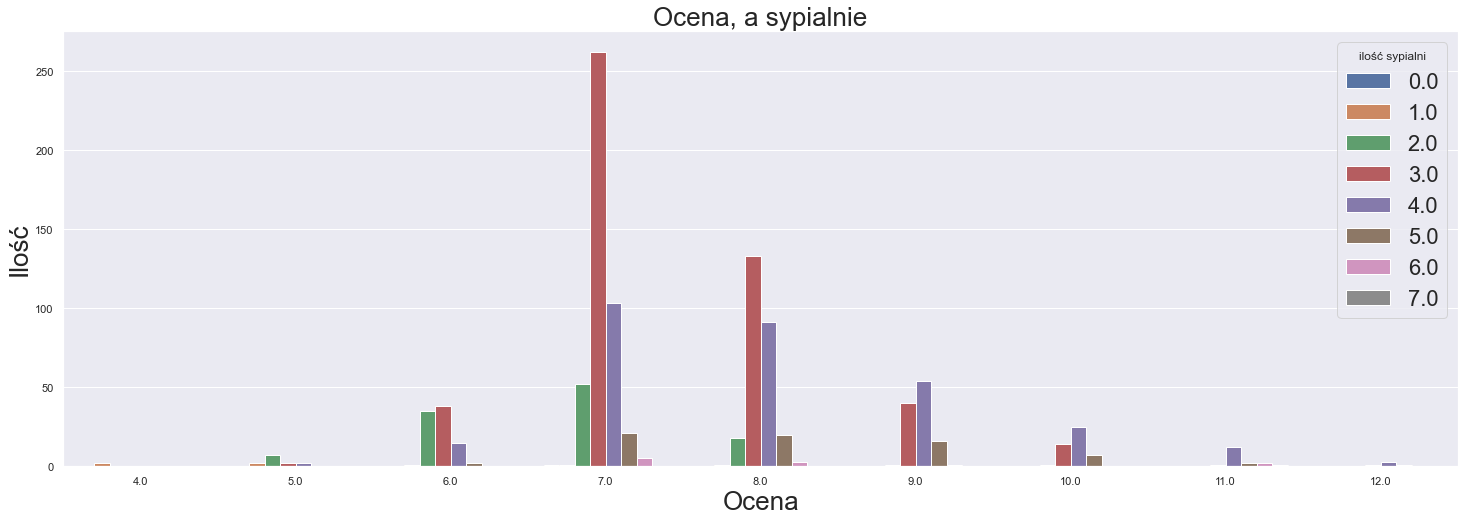

In [301]:
ax = sns.countplot(data = df_house, x = "grade", hue = "bedrooms")
sns.set(rc = {'figure.figsize':(25,8)})
plt.title("Ocena, a sypialnie", fontsize=26)
plt.xlabel("Ocena", fontsize=26)
plt.ylabel("Ilość", fontsize=26)
plt.legend(title = "ilość sypialni", fontsize=22,loc='upper right')
plt.show()

Przy dużej ocenie jest inna proporcja w rozkładzie ilości sypialni. Zaczyna wzrastać procentowa ilość mieszkań z co raz większą ilością sypialń.